In [1]:
import pandas as pd
import random

# Set random seed for reproducibility
random.seed(42)

# Create a simulated dataset
num_campaigns = 10
data = {
    "Campaign ID": [f"Camp_{i+1}" for i in range(num_campaigns)],
    "Impressions": [random.randint(500, 10000) for _ in range(num_campaigns)],
    "Clicks": [random.randint(10, 500) for _ in range(num_campaigns)],
    "Conversions": [random.randint(0, 50) for _ in range(num_campaigns)],
    "Spend": [round(random.uniform(50, 500), 2) for _ in range(num_campaigns)],
    "Revenue": [round(random.uniform(20, 1000), 2) for _ in range(num_campaigns)],
    "Status": ["Active"] * num_campaigns
}

# Convert to DataFrame
campaign_data = pd.DataFrame(data)

# Save as CSV for later use
campaign_data.to_csv("campaign_data.csv", index=False)

# Display the dataset
campaign_data


,Campaign ID,Impressions,Clicks,Conversions,Spend,Revenue,Status
0,Camp_1,2324,26,45,391.46,279.23,Active
1,Camp_2,909,25,41,121.85,62.58,Active
2,Camp_3,5006,57,44,240.18,470.24,Active
3,Camp_4,4512,121,34,175.04,142.33,Active
4,Camp_5,4157,129,26,146.89,923.85,Active
5,Camp_6,2786,268,14,393.57,97.22,Active
6,Camp_7,2179,318,28,95.99,307.31,Active
7,Camp_8,9435,23,37,220.97,636.07,Active
8,Camp_9,1924,297,17,211.54,887.74,Active
9,Camp_10,7412,111,0,204.78,374.40,Active


In [2]:
# Load the dataset
df = pd.read_csv("campaign_data.csv")

# Fill missing values (if any)
df.fillna(0, inplace=True)

# Calculate derived metrics
df["CTR (%)"] = (df["Clicks"] / df["Impressions"]) * 100  # Click-Through Rate
df["ROAS"] = df["Revenue"] / df["Spend"]  # Return on Ad Spend
df["CPA"] = df["Spend"] / df["Conversions"]  # Cost Per Acquisition

# Handle divide-by-zero issues (e.g., no conversions)
df["CPA"] = df["CPA"].replace([float('inf'), -float('inf')], 0)

# Display processed dataset
df


,Campaign ID,Impressions,Clicks,Conversions,Spend,Revenue,Status,CTR (%),ROAS,CPA
0,Camp_1,2324,26,45,391.46,279.23,Active,1.118761,0.713304,8.699111
1,Camp_2,909,25,41,121.85,62.58,Active,2.750275,0.513582,2.971951
2,Camp_3,5006,57,44,240.18,470.24,Active,1.138634,1.957865,5.458636
3,Camp_4,4512,121,34,175.04,142.33,Active,2.681738,0.813128,5.148235
4,Camp_5,4157,129,26,146.89,923.85,Active,3.103199,6.289400,5.649615
5,Camp_6,2786,268,14,393.57,97.22,Active,9.619526,0.247021,28.112143
6,Camp_7,2179,318,28,95.99,307.31,Active,14.593850,3.201479,3.428214
7,Camp_8,9435,23,37,220.97,636.07,Active,0.243773,2.878536,5.972162
8,Camp_9,1924,297,17,211.54,887.74,Active,15.436590,4.196559,12.443529
9,Camp_10,7412,111,0,204.78,374.40,Active,1.497572,1.828304,0.000000


In [3]:
# Define a target CPA for calculations
TARGET_CPA = 30  # Example target cost per acquisition

# Define the optimization rules
def check_campaign_rules(df):
    actions = []

    for _, row in df.iterrows():
        campaign_id = row["Campaign ID"]
        ctr = row["CTR (%)"]
        cpa = row["CPA"]
        roas = row["ROAS"]
        conversions = row["Conversions"]

        # Pause Campaign Rules
        if ctr < 1:
            actions.append({
                "Campaign ID": campaign_id,
                "Action": "Pause",
                "Reason": "CTR < 1%"
            })
        elif cpa > 3 * TARGET_CPA:
            actions.append({
                "Campaign ID": campaign_id,
                "Action": "Pause",
                "Reason": f"CPA > 3× Target CPA (CPA: {cpa:.2f}, Target CPA: {TARGET_CPA})"
            })

        # Increase Budget Rules
        if roas > 4:
            actions.append({
                "Campaign ID": campaign_id,
                "Action": "Increase Budget",
                "Reason": f"ROAS > 4 (ROAS: {roas:.2f})"
            })

        # Decrease Budget Rules
        if roas < 1.5:
            actions.append({
                "Campaign ID": campaign_id,
                "Action": "Decrease Budget",
                "Reason": f"ROAS < 1.5 (ROAS: {roas:.2f})"
            })

    return pd.DataFrame(actions)


In [5]:
check_campaign_rules(df)

,Campaign ID,Action,Reason
0,Camp_1,Decrease Budget,ROAS < 1.5 (ROAS: 0.71)
1,Camp_2,Decrease Budget,ROAS < 1.5 (ROAS: 0.51)
2,Camp_4,Decrease Budget,ROAS < 1.5 (ROAS: 0.81)
3,Camp_5,Increase Budget,ROAS > 4 (ROAS: 6.29)
4,Camp_6,Decrease Budget,ROAS < 1.5 (ROAS: 0.25)
5,Camp_8,Pause,CTR < 1%
6,Camp_9,Increase Budget,ROAS > 4 (ROAS: 4.20)


In [15]:
import pandas as pd

# Sample campaign data for testing
test_data = {
    "Campaign ID": ["Camp_1", "Camp_2", "Camp_3", "Camp_4"],
    "CTR (%)": [0.8, 3.5, 2.5, 0.6],          # Click-Through Rate
    "CPA": [35.5, 15.0, 120.0, 95.0],         # Cost Per Acquisition
    "ROAS": [1.2, 5.0, 3.0, 0.9],             # Return on Ad Spend
    "Conversions": [10, 25, 0, 5] ,            # Total conversions
    "Spend": [100, 200, 300, 150]              #example spend values
}

# Create a DataFrame
test_df = pd.DataFrame(test_data)

# Display the test dataset
test_df


,Campaign ID,CTR (%),CPA,ROAS,Conversions,Spend
0,Camp_1,0.8,35.5,1.2,10,100
1,Camp_2,3.5,15.0,5.0,25,200
2,Camp_3,2.5,120.0,3.0,0,300
3,Camp_4,0.6,95.0,0.9,5,150


In [7]:
# Apply the rules to the test data
actions_df = check_campaign_rules(test_df)

# Display the recommended actions
actions_df


,Campaign ID,Action,Reason
0,Camp_1,Pause,CTR < 1%
1,Camp_1,Decrease Budget,ROAS < 1.5 (ROAS: 1.20)
2,Camp_2,Increase Budget,ROAS > 4 (ROAS: 5.00)
3,Camp_3,Pause,"CPA > 3× Target CPA (CPA: 120.00, Target CPA: 30)"
4,Camp_4,Pause,CTR < 1%
5,Camp_4,Decrease Budget,ROAS < 1.5 (ROAS: 0.90)


C:\Users\Sachin\AppData\Local\Temp\ipykernel_13436\2949034275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette="viridis")


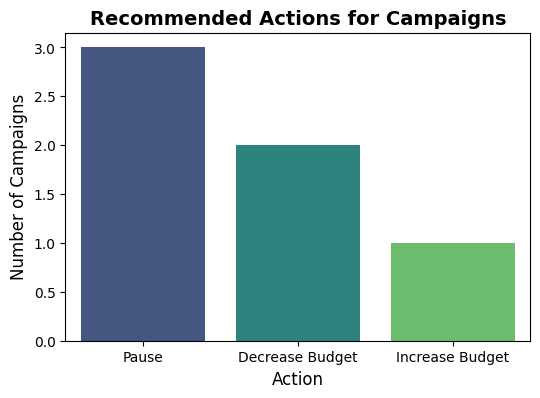

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count actions by type
action_counts = actions_df["Recommended Action"].value_counts()

# Plot the action counts
plt.figure(figsize=(6, 4))
sns.barplot(x=action_counts.index, y=action_counts.values, palette="viridis")
plt.title("Recommended Actions for Campaigns", fontsize=14,weight = 'bold')
plt.xlabel("Action", fontsize=12)
plt.ylabel("Number of Campaigns", fontsize=12)
plt.show()


#Automation Pipeline

In [11]:
def execute_actions(df, actions_df):
    # Create a copy of the dataset to avoid modifying the original
    updated_df = df.copy()

    # Iterate through the recommended actions
    for _, action in actions_df.iterrows():
        campaign_id = action["Campaign ID"]
        recommended_action = action["Action"]

        # Apply actions based on the recommendation
        if recommended_action == "Pause":
            updated_df.loc[updated_df["Campaign ID"] == campaign_id, "Status"] = "Paused"
        elif recommended_action == "Increase Budget":
            # Simulate increasing budget by 20%
            updated_df.loc[updated_df["Campaign ID"] == campaign_id, "Spend"] *= 1.2
        elif recommended_action == "Decrease Budget":
            # Simulate decreasing budget by 20%
            updated_df.loc[updated_df["Campaign ID"] == campaign_id, "Spend"] *= 0.8

    return updated_df


In [23]:
def generate_report(actions_df, original_df, updated_df):
    print("=== Campaign Optimization Report ===\n")
    print("Actions Taken:\n")
    for _, action in actions_df.iterrows():
        campaign_id = action["Campaign ID"]
        reason = action["Reason"]
        print(f"- {campaign_id}: {action['Action']} (Reason: {reason})")

    print("\n\nUpdated Campaign Metrics:\n")
    

    comparison = original_df.merge(updated_df, on="Campaign ID", suffixes=("_Before", "_After"))
    print(comparison[["Campaign ID", "Spend_Before", "Spend_After", "Status_Before", "Status_After"]])


In [24]:
# Step 1: Load sample data
# Add a default Status column to original_df

original_df = test_df.copy()
original_df["Status"] = "Active"

# Step 2: Analyze performance and recommend actions
actions_df = check_campaign_rules(original_df)

# Step 3: Apply actions to campaigns
updated_df = execute_actions(original_df, actions_df)

# Step 4: Generate a report
generate_report(actions_df, original_df, updated_df)


=== Campaign Optimization Report ===

Actions Taken:

- Camp_1: Pause (Reason: CTR < 1%)
- Camp_1: Decrease Budget (Reason: ROAS < 1.5 (ROAS: 1.20))
- Camp_2: Increase Budget (Reason: ROAS > 4 (ROAS: 5.00))
- Camp_3: Pause (Reason: CPA > 3× Target CPA (CPA: 120.00, Target CPA: 30))
- Camp_4: Pause (Reason: CTR < 1%)
- Camp_4: Decrease Budget (Reason: ROAS < 1.5 (ROAS: 0.90))


Updated Campaign Metrics:

  Campaign ID  Spend_Before  Spend_After Status_Before Status_After
0      Camp_1           100           80        Active       Paused
1      Camp_2           200          240        Active       Active
2      Camp_3           300          300        Active       Paused
3      Camp_4           150          120        Active       Paused


In [25]:
def generate_detailed_report(actions_df, original_df, updated_df):
    print("\n===== Daily Campaign Report =====\n")
    
    # 1. Summary of Actions Taken
    print("Summary of Actions:")
    action_counts = actions_df["Recommended Action"].value_counts()
    for action, count in action_counts.items():
        print(f"  {action}: {count} campaigns")
    
    print("\nCampaigns by Action:")
    for action in actions_df["Recommended Action"].unique():
        campaigns = actions_df[actions_df["Recommended Action"] == action]["Campaign ID"].tolist()
        print(f"  {action}: {', '.join(campaigns)}")
    
    # 2. Key Metrics Comparison
    print("\nKey Metrics Comparison (Before and After):")
    comparison = original_df.merge(updated_df, on="Campaign ID", suffixes=("_Before", "_After"))
    for metric in ["Spend", "Conversions", "CTR (%)"]:
        if metric in original_df.columns:
            print(f"\n  {metric}:")
            print(comparison[[f"{metric}_Before", f"{metric}_After"]].describe())
    
    # 3. Optimization Suggestions
    print("\nOptimization Suggestions:")
    for _, row in actions_df.iterrows():
        campaign_id = row["Campaign ID"]
        action = row["Recommended Action"]
        if action == "Pause Campaign":
            print(f"  Campaign {campaign_id}: Consider revising ad creatives or targeting.")
        elif action == "Increase Budget":
            print(f"  Campaign {campaign_id}: Explore scaling successful targeting segments.")
        elif action == "Decrease Budget":
            print(f"  Campaign {campaign_id}: Reassess performance data and ad relevance.")
    
    print("\n===== End of Report =====\n")


In [28]:
actions_df.rename(columns={"Action": "Recommended Action"}, inplace=True)
print("Actions DataFrame columns:", actions_df.columns)
print(actions_df.head())


Actions DataFrame columns: Index(['Campaign ID', 'Recommended Action', 'Reason'], dtype='object')
  Campaign ID Recommended Action  \
0      Camp_1              Pause   
1      Camp_1    Decrease Budget   
2      Camp_2    Increase Budget   
3      Camp_3              Pause   
4      Camp_4              Pause   

                                              Reason  
0                                           CTR < 1%  
1                            ROAS < 1.5 (ROAS: 1.20)  
2                              ROAS > 4 (ROAS: 5.00)  
3  CPA > 3× Target CPA (CPA: 120.00, Target CPA: 30)  
4                                           CTR < 1%  


In [29]:
generate_detailed_report(actions_df, original_df, updated_df)


===== Daily Campaign Report =====

Summary of Actions:
  Pause: 3 campaigns
  Decrease Budget: 2 campaigns
  Increase Budget: 1 campaigns

Campaigns by Action:
  Pause: Camp_1, Camp_3, Camp_4
  Decrease Budget: Camp_1, Camp_4
  Increase Budget: Camp_2

Key Metrics Comparison (Before and After):

  Spend:
       Spend_Before  Spend_After
count      4.000000     4.000000
mean     187.500000   185.000000
std       85.391256   102.469508
min      100.000000    80.000000
25%      137.500000   110.000000
50%      175.000000   180.000000
75%      225.000000   255.000000
max      300.000000   300.000000

  Conversions:
       Conversions_Before  Conversions_After
count            4.000000           4.000000
mean            10.000000          10.000000
std             10.801234          10.801234
min              0.000000           0.000000
25%              3.750000           3.750000
50%              7.500000           7.500000
75%             13.750000          13.750000
max             25.0

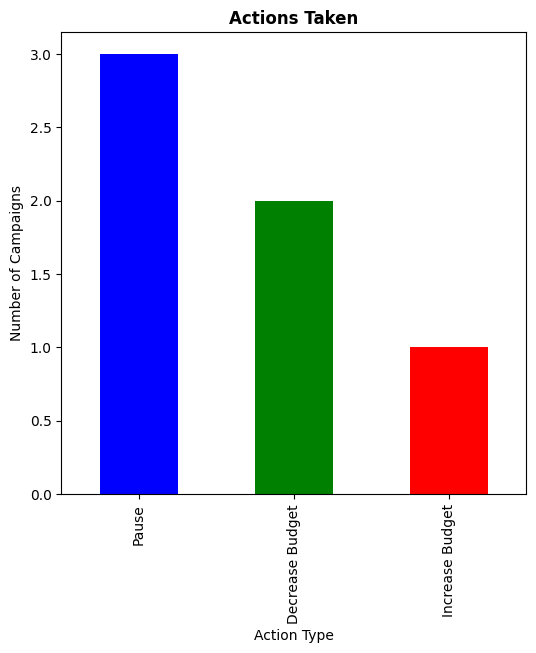

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
action_counts = actions_df["Recommended Action"].value_counts()
action_counts.plot(kind="bar", color=["blue", "green", "red"])
plt.title("Actions Taken",weight='bold')
plt.xlabel("Action Type")
plt.ylabel("Number of Campaigns")
plt.show()


In [43]:
!pip install openai

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 1.2 MB/s eta 0:00:02
   --------------- ------------------------ 0.8/2.0 MB 1.1 MB/s eta 0:00:02
   --------------- ------------------------ 0.8/2.0 MB 1.1 MB/s eta 0:00:02
   --------------------- ------------------ 1.0/2.0 MB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.0 MB 1.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.8/2.0 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.0 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import openai

# Set your OpenAI API key
openai.api_key = "your-api-key"

def generate_llm_insights(updated_df):
     prompt = f"""
    You are an AI marketing expert. Analyze the following campaign data and provide actionable insights.
    Include recommendations for improving ad copy, budget allocation, or targeting. Here's the data:

    {campaign_summary}

    Provide your analysis and suggestions:
    """
    try:
        # Using the new API
        response = openai.completions.create(
            model="gpt-3.5-turbo",
            prompt=prompt,
            max_tokens=100
        )
        return response["choices"][0]["text"]
    except Exception as e:
        return f"Error generating insights: {str(e)}"



In [67]:
def generate_detailed_report_with_insights(actions_df, original_df, updated_df):
    """
    Generate a detailed daily report with LLM-based insights.
    """
    print("\n===== Daily Campaign Report =====\n")

    # 1. Summary of Actions
    print("Summary of Actions:")
    actions_df.rename(columns={"Recommended Action": "Action"}, inplace=True)
    action_counts = actions_df["Action"].value_counts()
    for action, count in action_counts.items():
        print(f"  {action}: {count} campaigns")

    # 2. Detailed Updates
    try:
        print("\n\nDetailed Updates:")
        detailed_updates = updated_df.merge(
            actions_df, on="Campaign ID", how="left"
        )
        print(detailed_updates[["Campaign ID", "Action", "Reason", "Spend", "Status"]])
    except KeyError as e:
        print(f"Error: Missing column - {e}")
        print("Available columns:", detailed_updates.columns)

    # 3. LLM Insights
    print("\n\nLLM Insights:")
    llm_insights = generate_llm_insights(updated_df)
    print(llm_insights)


In [68]:
generate_detailed_report_with_insights(actions_df, original_df, updated_df)



===== Daily Campaign Report =====

Summary of Actions:
  Pause: 3 campaigns
  Decrease Budget: 2 campaigns
  Increase Budget: 1 campaigns


Detailed Updates:
  Campaign ID           Action  \
0      Camp_1            Pause   
1      Camp_1  Decrease Budget   
2      Camp_2  Increase Budget   
3      Camp_3            Pause   
4      Camp_4            Pause   
5      Camp_4  Decrease Budget   

                                              Reason  Spend  Status  
0                                           CTR < 1%     80  Paused  
1                            ROAS < 1.5 (ROAS: 1.20)     80  Paused  
2                              ROAS > 4 (ROAS: 5.00)    240  Active  
3  CPA > 3× Target CPA (CPA: 120.00, Target CPA: 30)    300  Paused  
4                                           CTR < 1%    120  Paused  
5                            ROAS < 1.5 (ROAS: 0.90)    120  Paused  


LLM Insights:
Error generating insights: Error code: 429 - {'error': {'message': 'You exceeded your current qu

In [71]:
import pandas as pd

# Sample original and updated DataFrames
original_df = pd.DataFrame({
    'Campaign ID': [1, 2, 3],
    'CTR (%)': [5.2, 4.8, 6.0],
    'CPA': [10.5, 8.7, 12.1],
    'ROAS': [2.5, 3.0, 2.8],
    'Conversions': [100, 150, 120],
    'Spend': [1000, 1500, 1200],
    'Status': ['Active', 'Paused', 'Active']
})

updated_df = pd.DataFrame({
    'Campaign ID': [1, 2, 3],
    'CTR (%)': [5.5, 4.6, 6.3],
    'CPA': [9.8, 8.9, 11.5],
    'ROAS': [2.7, 3.1, 2.9],
    'Conversions': [105, 155, 125],
    'Spend': [1100, 1600, 1300],
    'Status': ['Active', 'Paused', 'Active']
})

actions_df = pd.DataFrame({
    'Campaign ID': [1, 2, 3],
    'Recommended Action': ['Increase Spend', 'Pause Campaign', 'Increase Spend'],
    'Reason': ['Better CTR', 'Low ROAS', 'Higher Conversion']
})

# Now, generate the detailed report with insights
generate_detailed_report_with_insights(actions_df, original_df, updated_df)



===== Daily Campaign Report =====

Summary of Actions:
  Increase Spend: 2 campaigns
  Pause Campaign: 1 campaigns


Detailed Updates:
   Campaign ID          Action             Reason  Spend  Status
0            1  Increase Spend         Better CTR   1100  Active
1            2  Pause Campaign           Low ROAS   1600  Paused
2            3  Increase Spend  Higher Conversion   1300  Active


LLM Insights:
Error generating insights: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


#Automating LLM insights Retreival

In [1]:
!pip install apscheduler


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from apscheduler.schedulers.blocking import BlockingScheduler

# Function to run the report generation process
def scheduled_report_generation():
    # Retrieve and process campaign data
    original_df = fetch_campaign_data()  # Replace with your data-fetching logic
    updated_df = apply_updates(original_df)
    actions_df = determine_actions(updated_df)  # Generate actions to improve campaigns

    # Generate and save the report
    generate_detailed_report_with_insights(actions_df, original_df, updated_df)

# Schedule the function to run daily
scheduler = BlockingScheduler()
scheduler.add_job(scheduled_report_generation, 'interval', days=1)
scheduler.start()


In [ ]:
import pandas as pd
import openai
from matplotlib import pyplot as plt
from apscheduler.schedulers.blocking import BlockingScheduler

# Step 1: Data Collection
def fetch_campaign_data():
    # Mock function; replace with API calls
    return pd.read_csv("campaign_data.csv")

# Step 2: Data Preprocessing
def preprocess_data(data):
    data.fillna(0, inplace=True)
    return data

# Step 3: Generate Insights
def generate_llm_insights(updated_df):
    prompt = f"""
    Analyze the following campaign data and provide recommendations:
    {updated_df.head(5).to_string(index=False)}
    """
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[{"role": "system", "content": "You are a marketing expert."},
                      {"role": "user", "content": prompt}]
        )
        return response['choices'][0]['message']['content']
    except Exception as e:
        return f"Error generating insights: {str(e)}"

# Step 4: Generate Visual Report
def generate_visual_report(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Campaign ID'], data['CTR (%)'], color='blue')
    plt.title('CTR by Campaign')
    plt.xlabel('Campaign ID')
    plt.ylabel('CTR (%)')
    plt.savefig("visual_report.png")

# Step 5: Combine and Export Reports
def create_pdf_report(text_summary, filename="Campaign_Report.pdf"):
    from reportlab.pdfgen import canvas
    c = canvas.Canvas(filename)
    c.drawString(100, 750, "Campaign Report")
    c.drawString(100, 730, text_summary)
    c.drawImage("visual_report.png", 50, 400, width=500, height=300)
    c.save()

# Full Pipeline Execution
def generate_full_report():
    # Fetch and preprocess data
    original_df = fetch_campaign_data()
    processed_df = preprocess_data(original_df)

    # Generate insights
    llm_insights = generate_llm_insights(processed_df)

    # Generate visualization
    generate_visual_report(processed_df)

    # Export the final report
    create_pdf_report(llm_insights)
    print("Report generated successfully!")

# Schedule and Run
scheduler = BlockingScheduler()
scheduler.add_job(generate_full_report, 'interval', days=1)
scheduler.start()
